In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read the data File

In [2]:
analyst_ratings_data = pd.read_csv('../data/raw_analyst_ratings.csv')

## Convert the date column to datetime formate

In [4]:
# Convert the 'date' column to datetime format a
analyst_ratings_data['date'] = pd.to_datetime(analyst_ratings_data['date'], errors='coerce')

# Verify the conversion
print(analyst_ratings_data['date'].head())



0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


## Check the data type of the date convert to datetime

In [5]:
# Check the data type of the 'date' column
print(analyst_ratings_data['date'].dtype)


datetime64[ns, UTC-04:00]


## Extract the year month day and day of week

In [6]:
# Now extract the year, month, day, and day of the week
analyst_ratings_data['year'] = analyst_ratings_data['date'].dt.year
analyst_ratings_data['month'] = analyst_ratings_data['date'].dt.month
analyst_ratings_data['day'] = analyst_ratings_data['date'].dt.day
analyst_ratings_data['day_of_week'] = analyst_ratings_data['date'].dt.day_name()

# Display the first few rows to verify the extraction
print(analyst_ratings_data[['date', 'year', 'month', 'day', 'day_of_week']].head())


                       date    year  month   day day_of_week
0 2020-06-05 10:30:54-04:00  2020.0    6.0   5.0      Friday
1 2020-06-03 10:45:20-04:00  2020.0    6.0   3.0   Wednesday
2 2020-05-26 04:30:07-04:00  2020.0    5.0  26.0     Tuesday
3 2020-05-22 12:45:06-04:00  2020.0    5.0  22.0      Friday
4 2020-05-22 11:38:59-04:00  2020.0    5.0  22.0      Friday


## Aggregate Date by Time Periods by Month and Year

In [7]:
# Aggregate data by month
monthly_data = analyst_ratings_data.groupby(['year', 'month']).size().reset_index(name='count')

# Aggregate data by year
yearly_data = analyst_ratings_data.groupby('year').size().reset_index(name='count')


## Plot time Series Data

In [9]:
print(monthly_data.dtypes)


year     float64
month    float64
count      int64
dtype: object


## 

In [10]:
# convert into integer the data-type
monthly_data['year'] = monthly_data['year'].astype(int)
monthly_data['month'] = monthly_data['month'].astype(int)


In [11]:
print(monthly_data.dtypes)

year     int64
month    int64
count    int64
dtype: object


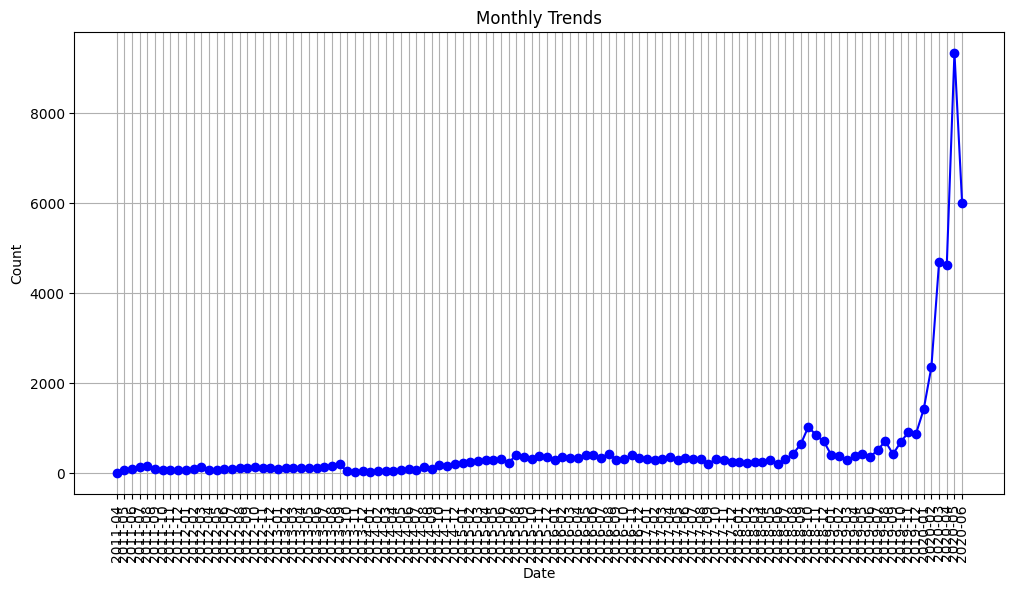

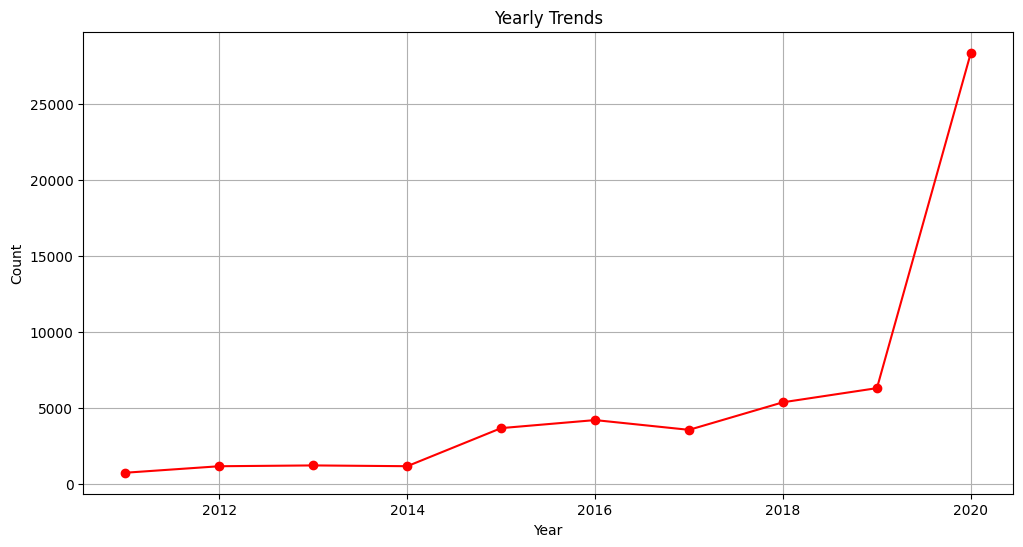

In [12]:
import matplotlib.pyplot as plt

# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['count'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(ticks=range(len(monthly_data)), labels=[f'{row["year"]}-{row["month"]:02d}' for _, row in monthly_data.iterrows()], rotation=90)
plt.grid(True)
plt.show()

# Plot yearly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['count'], marker='o', linestyle='-', color='r')
plt.title('Yearly Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()
